In [1]:
import graphviz 
from sklearn import tree
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score
import pickle as pkl
import numpy as np
import pandas as pd

In [2]:
# KLASYFIKACJA breast_cancer


In [3]:
data_breast_cancer = datasets.load_breast_cancer(as_frame=True) 

In [4]:
X = data_breast_cancer['data']

In [5]:
y = data_breast_cancer['target']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
#max_depth = 2
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X_train, y_train)
f1Train = f1_score(y_train, tree_clf.predict(X_train))
f1Test = f1_score(y_test, tree_clf.predict(X_test))
print(f1Train)
print(f1Test)

0.9452054794520547
0.9452054794520549


In [8]:
#max_depth = 3 - NAJLEPSZY WYNIK DLA ZBIORU TESTOWEGO
tree_clf = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_clf.fit(X_train, y_train)
f1Train = f1_score(y_train, tree_clf.predict(X_train))
f1Test = f1_score(y_test, tree_clf.predict(X_test))
print(f1Train)
print(f1Test)

0.9826388888888888
0.9583333333333334


In [9]:
#graf dla najlepszego wyniku
f = "data_breast_cancer_tree.dot"
export_graphviz(
tree_clf,
out_file=f,
feature_names=data_breast_cancer.feature_names,
class_names=[str(num)+", "+name
for num,name in
zip(set(data_breast_cancer.target),
data_breast_cancer.target_names)],
rounded=True,
filled=True)
print(f)


graphviz.render('dot', 'png', filepath=f, outfile="bc.png")

data_breast_cancer_tree.dot


'bc.png'

In [10]:
#lista dla najlepszego wyniku
depth = 3
accTrain = accuracy_score(y_train, tree_clf.predict(X_train))
accTest = accuracy_score(y_test, tree_clf.predict(X_test))
bc_list = [depth, f1Train, f1Test, accTrain, accTest]

fileObject = open("f1acc_tree.pkl", 'wb')
pkl.dump(bc_list, fileObject)
fileObject.close()

print(bc_list)

[3, 0.9826388888888888, 0.9583333333333334, 0.978021978021978, 0.9473684210526315]


In [11]:
#max_depth = 4 - wartość f1 dla zbioru testowego spadła
tree_clf = DecisionTreeClassifier(max_depth=4, random_state=42)
tree_clf.fit(X_train, y_train)
f1Train = f1_score(y_train, tree_clf.predict(X_train))
f1Test = f1_score(y_test, tree_clf.predict(X_test))
print(f1Train)
print(f1Test)

0.9965156794425087
0.9577464788732394


In [12]:
#max_depth = 5
tree_clf = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_clf.fit(X_train, y_train)
f1Train = f1_score(y_train, tree_clf.predict(X_train))
f1Test = f1_score(y_test, tree_clf.predict(X_test))
print(f1Train)
print(f1Test)

0.9965156794425087
0.9577464788732394


In [13]:
#max_depth = 6 - wartość f1 dla zbioru testowego spadła jeszcze bardziej
tree_clf = DecisionTreeClassifier(max_depth=6, random_state=42)
tree_clf.fit(X_train, y_train)
f1Train = f1_score(y_train, tree_clf.predict(X_train))
f1Test = f1_score(y_test, tree_clf.predict(X_test))
print(f1Train)
print(f1Test)

0.9982547993019197
0.951048951048951


In [14]:
#max_depth = 7
tree_clf = DecisionTreeClassifier(max_depth=7, random_state=42)
tree_clf.fit(X_train, y_train)
f1Train = f1_score(y_train, tree_clf.predict(X_train))
f1Test = f1_score(y_test, tree_clf.predict(X_test))
print(f1Train)
print(f1Test)

1.0
0.9577464788732394


In [15]:
data_breast_cancer.feature_names[2:]

array(['mean perimeter', 'mean area', 'mean smoothness',
       'mean compactness', 'mean concavity', 'mean concave points',
       'mean symmetry', 'mean fractal dimension', 'radius error',
       'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [16]:
data_breast_cancer.target

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int32

In [17]:
#max_depth = 8
tree_clf = DecisionTreeClassifier(max_depth=8, random_state=42)
tree_clf.fit(X_train, y_train)
f1Train = f1_score(y_train, tree_clf.predict(X_train))
f1Test = f1_score(y_test, tree_clf.predict(X_test))
print(f1Train)
print(f1Test)



1.0
0.9577464788732394


In [18]:
#REGRESJA

<AxesSubplot:xlabel='x', ylabel='y'>

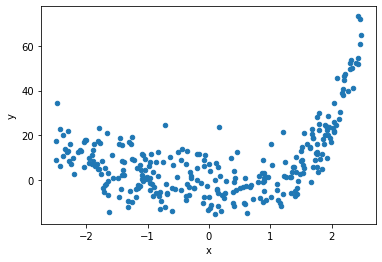

In [19]:
size = 300
X = np.random.rand(size)*5-2.5
w4, w3, w2, w1, w0 = 1, 2, 1, -4, 2
y = w4*(X**4) + w3*(X**3) + w2*(X**2) + w1*X + w0 + np.random.randn(size)*8-4
df = pd.DataFrame({'x': X, 'y': y})
df.plot.scatter(x='x',y='y')

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1,1)

In [22]:
#max_depth = 2
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
tree_clf = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_clf.fit(X_train, y_train)
mse1Train = mean_squared_error(y_train, tree_clf.predict(X_train))
mse1Test = mean_squared_error(y_test, tree_clf.predict(X_test))
print(mse1Train)
print(mse1Test)

76.70590916253602
97.45420288915572


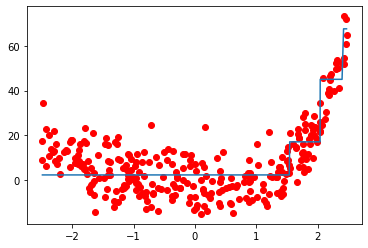

In [23]:
import matplotlib.pyplot as plt
plt.plot(X,y,'ro')
temp_X_train = np.sort(X_train, axis=0)
plt.plot(temp_X_train, tree_clf.predict(temp_X_train))

In [24]:
#max_depth = 3
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
tree_clf = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_clf.fit(X_train, y_train)
mse1Train = mean_squared_error(y_train, tree_clf.predict(X_train))
mse1Test = mean_squared_error(y_test, tree_clf.predict(X_test))
print(mse1Train)
print(mse1Test)

59.044624796397684
74.17300003708405


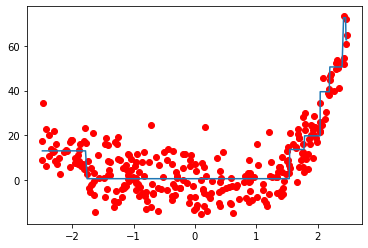

In [25]:
plt.plot(X,y,'ro')
temp_X_train = np.sort(X_train, axis=0)
plt.plot(temp_X_train, tree_clf.predict(temp_X_train))

In [26]:
#max_depth = 4 #NAJLEPSZY WYNIK: najmniejsza wartość MSE dla zbioru testowego
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
tree_clf = DecisionTreeRegressor(max_depth=4, random_state=42)
tree_clf.fit(X_train, y_train)
mse1Train = mean_squared_error(y_train, tree_clf.predict(X_train))
mse1Test = mean_squared_error(y_test, tree_clf.predict(X_test))
print(mse1Train)
print(mse1Test)

53.42890682543443
83.33261207573183


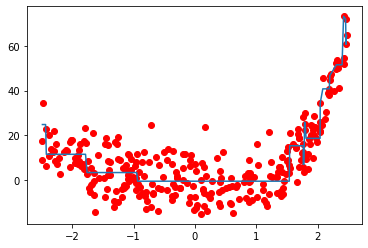

In [27]:
plt.plot(X,y,'ro')
temp_X_train = np.sort(X_train, axis=0)
plt.plot(temp_X_train, tree_clf.predict(temp_X_train))

In [28]:
#graf dla najlepszego wyniku
f = "reg_tree.dot"
export_graphviz(
tree_clf,
out_file=f,
#feature_names=data_breast_cancer.feature_names,
#class_names=[str(num)+", "+name
#for num,name in
#zip(set(data_breast_cancer.target),
#data_breast_cancer.target_names)],
#rounded=True,
#filled=True
)
print(f)


graphviz.render('dot', 'png', filepath=f, outfile="reg.png")

reg_tree.dot


'reg.png'

In [29]:
#lista dla najlepszego wyniku
depth = 4
reg_list = [depth, mse1Train, mse1Test]

fileObject = open("mse_tree.pkl", 'wb')
pkl.dump(reg_list, fileObject)
fileObject.close()

print(reg_list)

[4, 53.42890682543443, 83.33261207573183]


In [30]:
#max_depth = 5
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
tree_clf = DecisionTreeRegressor(max_depth=5, random_state=42)
tree_clf.fit(X_train, y_train)
mse1Train = mean_squared_error(y_train, tree_clf.predict(X_train))
mse1Test = mean_squared_error(y_test, tree_clf.predict(X_test))
print(mse1Train)
print(mse1Test)

48.03159481273257
86.22113049279122


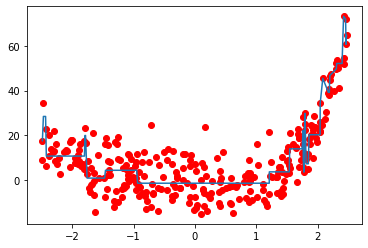

In [31]:
plt.plot(X,y,'ro')
temp_X_train = np.sort(X_train, axis=0)
plt.plot(temp_X_train, tree_clf.predict(temp_X_train))

In [32]:
#max_depth = 6
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
tree_clf = DecisionTreeRegressor(max_depth=6, random_state=42)
tree_clf.fit(X_train, y_train)
mse1Train = mean_squared_error(y_train, tree_clf.predict(X_train))
mse1Test = mean_squared_error(y_test, tree_clf.predict(X_test))
print(mse1Train)
print(mse1Test)

41.90886587439407
90.26295925537728


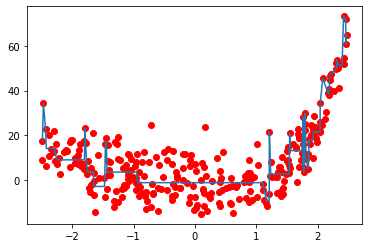

In [33]:
plt.plot(X,y,'ro')
temp_X_train = np.sort(X_train, axis=0)
plt.plot(temp_X_train, tree_clf.predict(temp_X_train))

In [34]:
#max_depth = 7
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
tree_clf = DecisionTreeRegressor(max_depth=7, random_state=42)
tree_clf.fit(X_train, y_train)
mse1Train = mean_squared_error(y_train, tree_clf.predict(X_train))
mse1Test = mean_squared_error(y_test, tree_clf.predict(X_test))
print(mse1Train)
print(mse1Test)

37.90589943599178
92.55960859505876


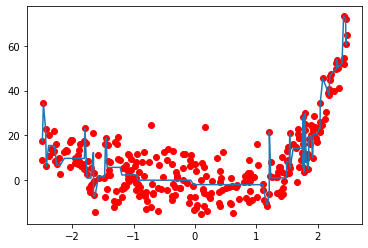

In [35]:
plt.plot(X,y,'ro')
temp_X_train = np.sort(X_train, axis=0)
plt.plot(temp_X_train, tree_clf.predict(temp_X_train))

In [36]:
#max_depth = 8
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
tree_clf = DecisionTreeRegressor(max_depth=8, random_state=42)
tree_clf.fit(X_train, y_train)
mse1Train = mean_squared_error(y_train, tree_clf.predict(X_train))
mse1Test = mean_squared_error(y_test, tree_clf.predict(X_test))
print(mse1Train)
print(mse1Test)

32.17170144879267
107.88752413044806


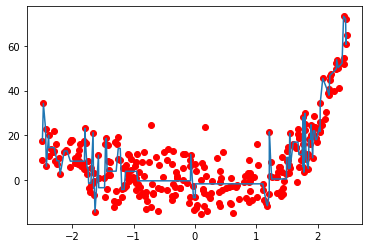

In [37]:
plt.plot(X,y,'ro')
temp_X_train = np.sort(X_train, axis=0)
plt.plot(temp_X_train, tree_clf.predict(temp_X_train))